In [1]:
import networkx as nx
import numpy as np
from scipy.sparse import diags
import scipy.linalg
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


Karate Club

In [2]:

karate_graph = nx.karate_club_graph()

num_clusters = 2

In [3]:

def ratio_cut(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    degree_matrix = np.diag(np.array(np.sum(adjacency_matrix, axis=1)).flatten())
    
    laplacian_matrix = degree_matrix - adjacency_matrix

    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    
    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels


In [4]:
def normalized_cut(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    degree_vector = np.sum(adjacency_matrix, axis=1)

    degree_matrix = np.diag(degree_vector)
    degree_sqrt = scipy.linalg.sqrtm(degree_matrix)
    degree_sqrt_inv = np.linalg.inv(degree_sqrt)
    L = degree_matrix - adjacency_matrix

    normalized_laplacian_matrix = degree_sqrt_inv @ (L) @ degree_sqrt_inv

    eigenvalues, eigenvectors = np.linalg.eigh(normalized_laplacian_matrix)

    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels

In [5]:
def averaged_cut(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    n = len(graph)
    I = np.eye(n)
    
    laplacian_matrix = I - adjacency_matrix

    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    
    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels

In [6]:
def modularity(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    degree_vector = np.sum(adjacency_matrix, axis=1)

    d = np.diag(degree_vector)
    tr_d = np.einsum("ii->",d)
    Q = (1/tr_d)((d @ d.T)/tr_d)
    
    eigenvalues, eigenvectors = np.linalg.eigh(Q)

    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Ratio Cut:
[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


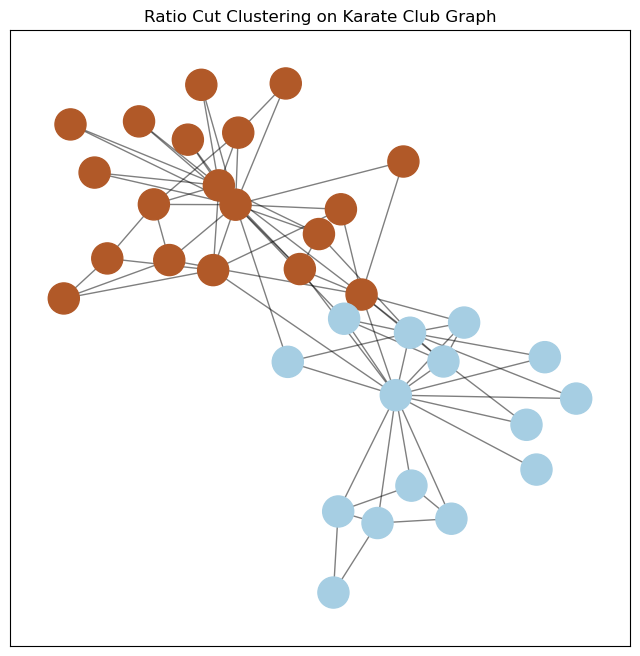

In [7]:
#ratio cut
labels_ratio_cut = ratio_cut(karate_graph, num_clusters)

print("Labels of nodes using Ratio Cut:")
print(labels_ratio_cut)

pos = nx.spring_layout(karate_graph)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate_graph, pos, node_color=labels_ratio_cut, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate_graph, pos, alpha=0.5)
plt.title("Ratio Cut Clustering on Karate Club Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using normalized Cut:
[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


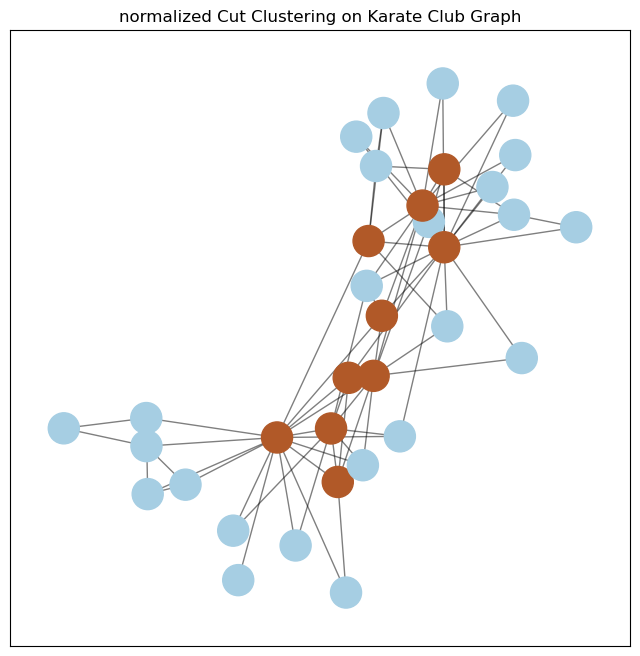

In [8]:
#normalized cut
labels_normalized_cut = normalized_cut(karate_graph, num_clusters)

print("Labels of nodes using normalized Cut:")
print(labels_ratio_cut)

pos = nx.spring_layout(karate_graph)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate_graph, pos, node_color=labels_normalized_cut, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate_graph, pos, alpha=0.5)
plt.title("normalized Cut Clustering on Karate Club Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Ratio Cut:
[1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]


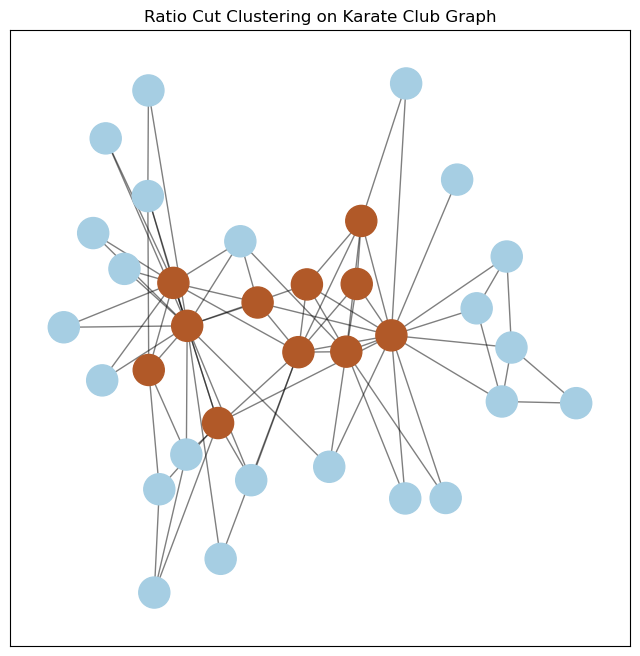

In [9]:
#averaged cut
labels_averaged_cut = averaged_cut(karate_graph, num_clusters)

print("Labels of nodes using Ratio Cut:")
print(labels_averaged_cut)

pos = nx.spring_layout(karate_graph)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate_graph, pos, node_color=labels_averaged_cut, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate_graph, pos, alpha=0.5)
plt.title("Ratio Cut Clustering on Karate Club Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Spectrul:
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


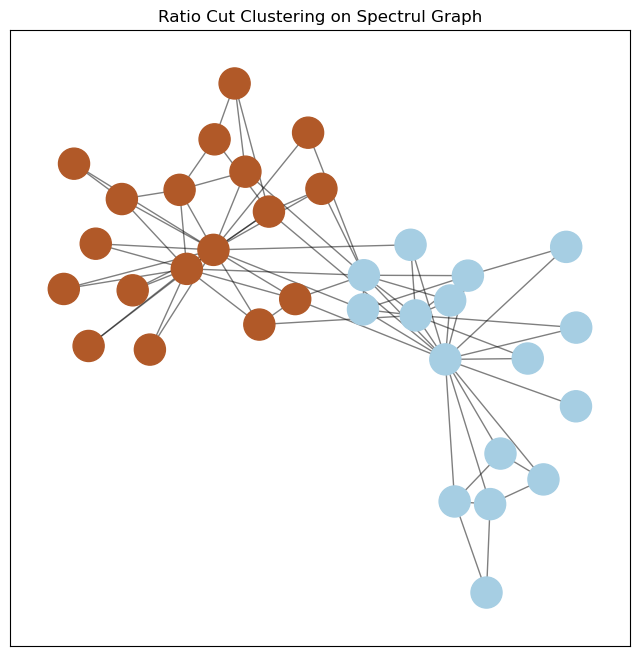

In [10]:
#Spectrul
adjacency_matrix = nx.adjacency_matrix(karate_graph).toarray()

spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=0)
labels_spectrul = spectral.fit_predict(adjacency_matrix)

print("Labels of nodes using Spectrul:")
print(labels_spectrul)

pos = nx.spring_layout(karate_graph)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate_graph, pos, node_color=labels_spectrul, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate_graph, pos, alpha=0.5)
plt.title("Ratio Cut Clustering on Spectrul Graph")
plt.show()

Evaluations


In [11]:
from sklearn.metrics import davies_bouldin_score

In [12]:
adjacency_matrix = nx.adjacency_matrix(karate_graph).toarray()


# davies_bouldin_score
davies_bouldin_ratio_cut = davies_bouldin_score(adjacency_matrix, labels_ratio_cut)
davies_bouldin_normalized_cut = davies_bouldin_score(adjacency_matrix, labels_normalized_cut)
davies_bouldin_averaged_cut = davies_bouldin_score(adjacency_matrix, labels_averaged_cut)
davies_bouldin_sectrul = davies_bouldin_score(adjacency_matrix, labels_spectrul)

print("Davies-Bouldin Score for Ratio Cut:", davies_bouldin_ratio_cut)
print("Davies-Bouldin Score for Normalized Cut:", davies_bouldin_normalized_cut)
print("Davies-Bouldin Score for Averaged Cut:", davies_bouldin_averaged_cut)
print("Davies-Bouldin Score for Spectrul:", davies_bouldin_sectrul)

Davies-Bouldin Score for Ratio Cut: 2.2357053933257345
Davies-Bouldin Score for Normalized Cut: 2.52423678843989
Davies-Bouldin Score for Averaged Cut: 2.453387942167605
Davies-Bouldin Score for Spectrul: 2.050306189913687


###FaceBook

In [13]:
facebook = pd.read_csv(
    "./facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook


,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


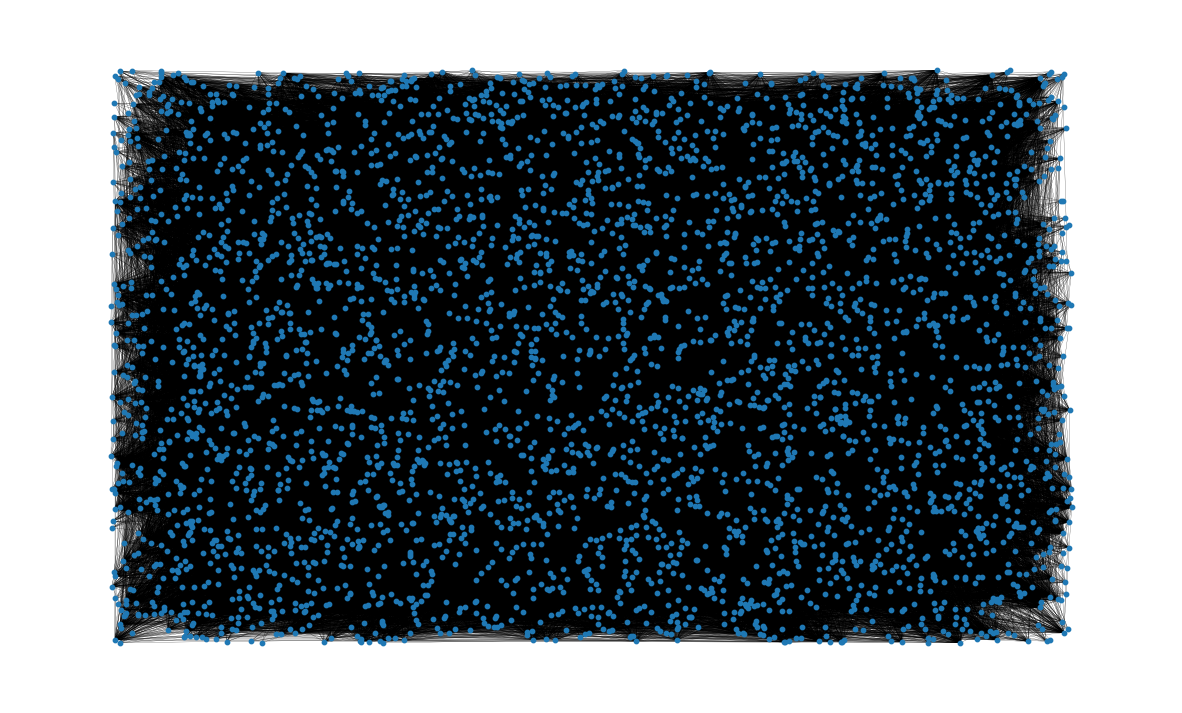

In [14]:
G_facebook = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G_facebook, pos=nx.random_layout(G_facebook), ax=ax, **plot_options)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels of nodes using Ratio Cut:
[1 1 1 ... 1 1 1]


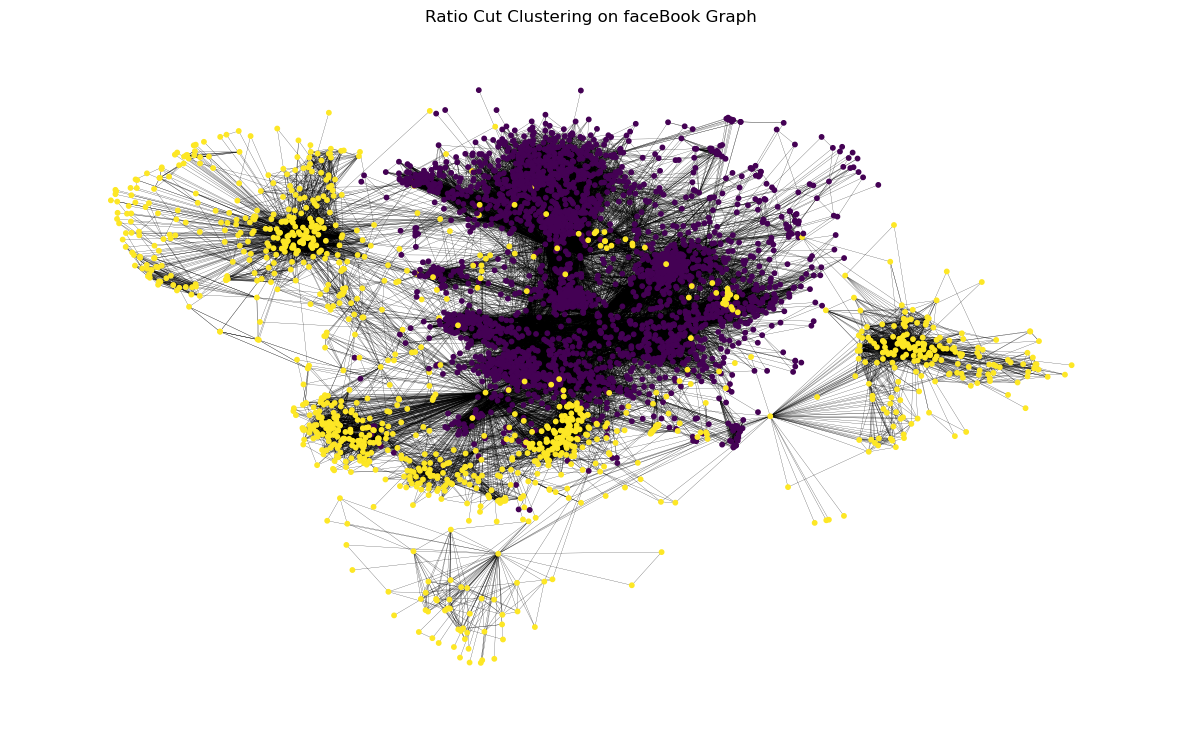

In [15]:
#ratio cut
labels_ratio_cut = ratio_cut(G_facebook, num_clusters)

print("Labels of nodes using Ratio Cut:")
print(labels_ratio_cut)


pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G_facebook, pos=pos, ax=ax, node_color=labels_ratio_cut, **plot_options)
plt.title("Ratio Cut Clustering on faceBook Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels of nodes using Normalized Cut:
[0 1 1 ... 1 1 1]


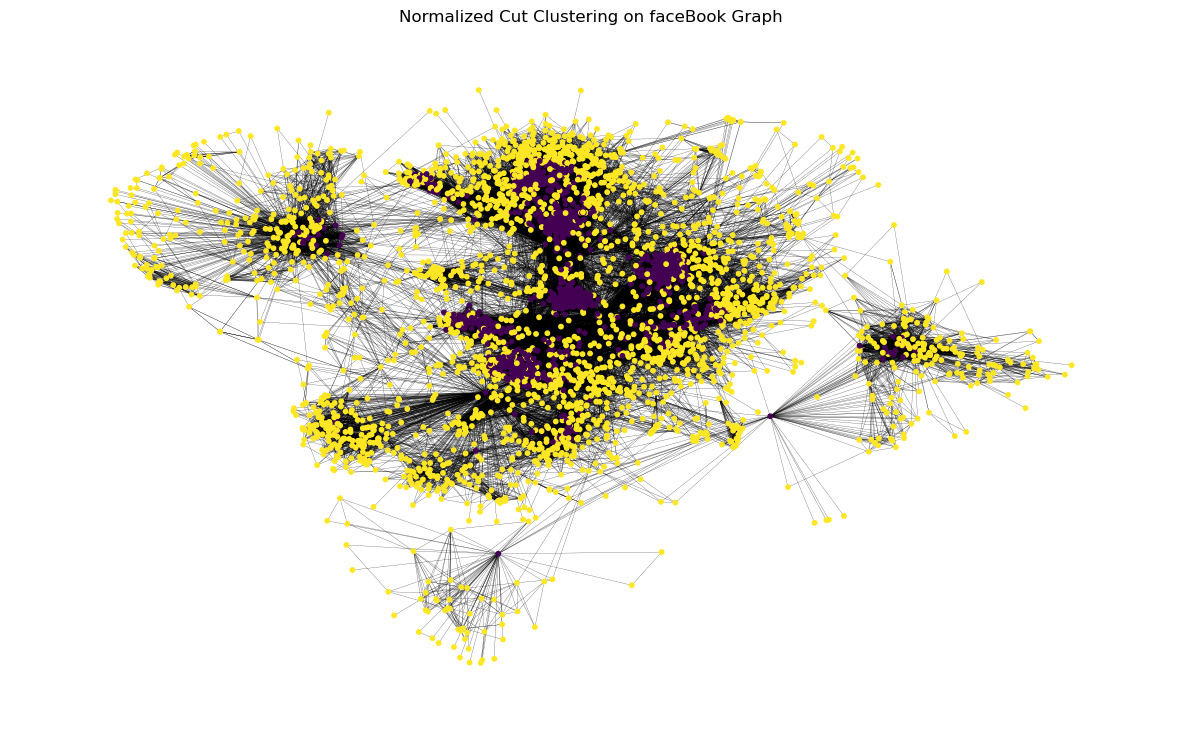

In [16]:
#normalized cut
labels_normalized_cut = normalized_cut(G_facebook, num_clusters)


print("Labels of nodes using Normalized Cut:")
print(labels_normalized_cut)


pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G_facebook, pos=pos, ax=ax, node_color=labels_normalized_cut, **plot_options)
plt.title("Normalized Cut Clustering on faceBook Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels of nodes using Average Cut:
[0 0 0 ... 0 0 0]


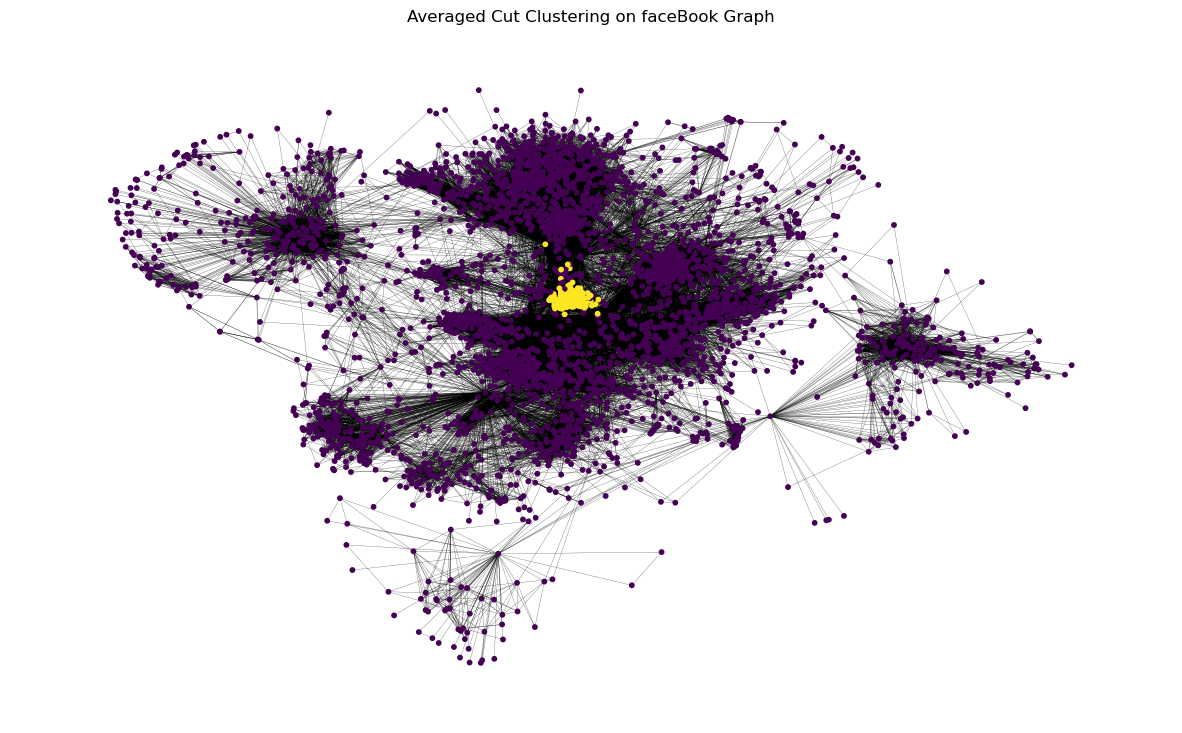

In [17]:
#averaged cut
labels_averaged_cut = averaged_cut(G_facebook, num_clusters)

print("Labels of nodes using Average Cut:")
print(labels_averaged_cut)


pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G_facebook, pos=pos, ax=ax, node_color=labels_averaged_cut, **plot_options)
plt.title("Averaged Cut Clustering on faceBook Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Spectrul:
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


ValueError: 'c' argument has 34 elements, which is inconsistent with 'x' and 'y' with size 4039.

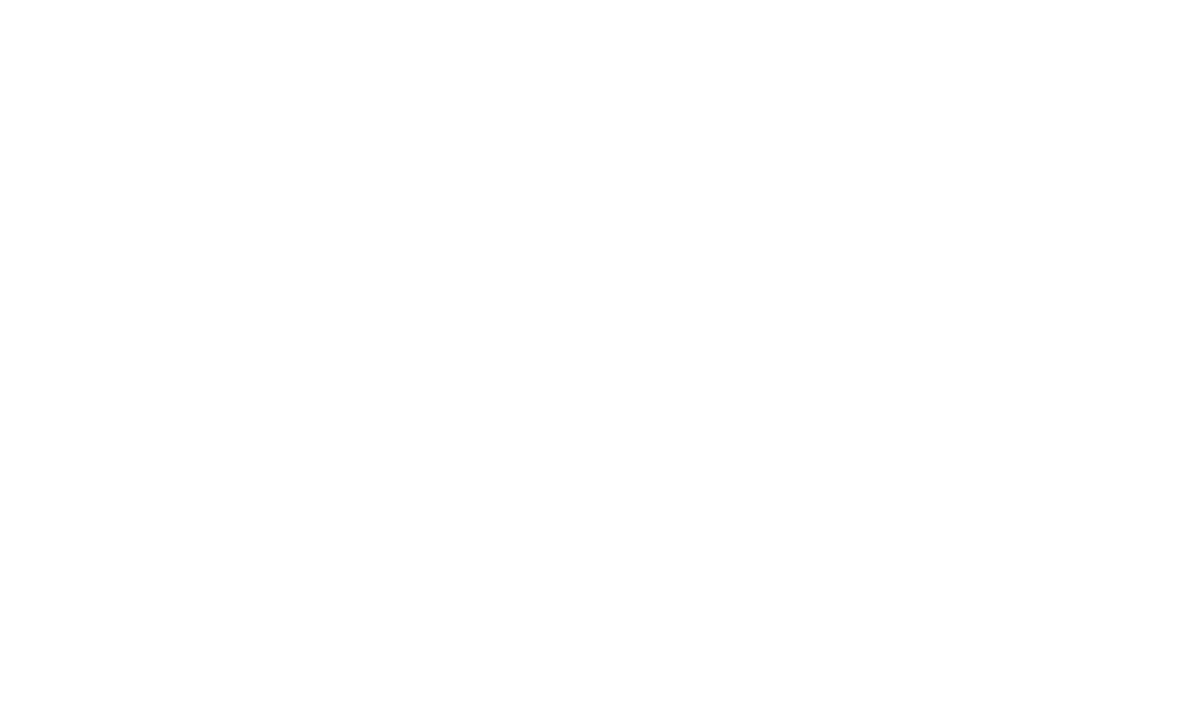

In [18]:
#Spectrul
adjacency_matrix = nx.adjacency_matrix(karate_graph).toarray()

spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=0)
labels_spectrul = spectral.fit_predict(adjacency_matrix)


print("Labels of nodes using Spectrul:")
print(labels_spectrul)


pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G_facebook, pos=pos, ax=ax, node_color=labels_spectrul, **plot_options)
plt.title("Spectrul Clustering on faceBook Graph")
plt.show()

In [20]:
adjacency_matrix = nx.adjacency_matrix(G_facebook).toarray()


# davies_bouldin_score
davies_bouldin_ratio_cut = davies_bouldin_score(adjacency_matrix, labels_ratio_cut)
davies_bouldin_normalized_cut = davies_bouldin_score(adjacency_matrix, labels_normalized_cut)
davies_bouldin_averaged_cut = davies_bouldin_score(adjacency_matrix, labels_averaged_cut)

print("Davies-Bouldin Score for Ratio Cut:", davies_bouldin_ratio_cut)
print("Davies-Bouldin Score for Normalized Cut:", davies_bouldin_normalized_cut)
print("Davies-Bouldin Score for Averaged Cut:", davies_bouldin_averaged_cut)


Davies-Bouldin Score for Ratio Cut: 6.0075892308810275
Davies-Bouldin Score for Normalized Cut: 4.761242477858049
Davies-Bouldin Score for Averaged Cut: 1.0388591252925365
